../../output/5_3/updated_average_results_fixed_N_35_v1.xlsx


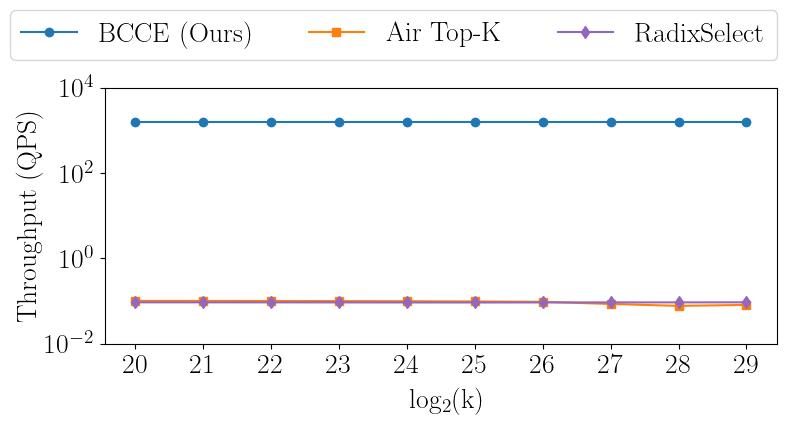

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 处理数据格式，去掉 "ms" 并转换为浮点数
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]
rcParams["font.size"] = 20

def clean_data(df):
    df_cleaned = df.copy()
    for col in df.columns[1:]:  # 跳过第一列 Method
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace("ms", "", regex=False).astype(float)
    return df_cleaned


# 绘制固定 k，变化 N 的图表
methods = ["BCCE (Ours)", "Air Top-K", "RadixSelect"]
markers = ["o", "s","d"]
colors = ['#1f77b4', '#ff7f0e', "#9467bd"]

fig, ax = plt.subplots(figsize=(8, 4), sharey=True)

file = f"../../output/5_3/updated_average_results_fixed_N_{35}_v1.xlsx"
# get data
df = pd.read_excel(file, sheet_name=None)
data = df[list(df.keys())[0]]
data = clean_data(data)
print(file)
query_scales = data.columns[1:].astype(str)
for idx, row in data.iterrows():
    method = row.iloc[0]  # 方法名称
    times = row.iloc[1:].astype(float)  # 运行时间数据
    times = 1 / times * 1000
    ax.plot(query_scales, times, marker=markers[idx], linestyle='-', label=methods[idx], color = colors[idx])

ax.set_xticks(query_scales)
ax.tick_params(axis="x")
ax.set_yscale("log")
ax.grid(False)
ax.set_ylim(10**-2, 10**4)

# 在顶部添加统一图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,ncol=3,bbox_to_anchor=(0.98, 1.05))
fig.text(0.01, 0.5, "Throughput (QPS)", va='center', rotation='vertical')
fig.text(0.55, 0.02, 'log$_2$(k)', ha='center')
# plt.subplots_adjust(left=0.03, right=0.99, top=0.92, bottom=0.07, wspace=0.15, hspace=0.26)
plt.tight_layout(rect=[0.01, 0.02, 1, 0.92])  # 调整布局为顶部图例留出空间
# plt.savefig(output_file, bbox_inches="tight", dpi=300)
plt.savefig("5_3_2_new.pdf",  bbox_inches="tight")
plt.show()
plt.close()


